In [45]:
!python -m pip install "tensorflow<2.11"

ERROR: Could not find a version that satisfies the requirement tensorflow<2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow<2.11


In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
import os
import glob

In [62]:
DATA_DIR = 'data/'
EPOCHS = 5
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

In [63]:
for file in os.listdir(DATA_DIR + 'Dog/'):
    if not file.endswith('.jpg'):
        print(file)

In [72]:
img_paths = glob.glob(os.path.join(DATA_DIR,'*/*.*'))

bad_paths = []

for image_path in img_paths:
    try:
      img_bytes = tf.io.read_file(image_path)
      decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
      bad_paths.append(image_path)

for bad_path in bad_paths:
    os.remove(bad_path)

Found bad path data\Cat\10404.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Found bad path data\Cat\4351.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: 
Found bad path data\Cat\666.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] name: 
Found bad path data\Dog\11233.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Found bad path data\Dog\11702.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] 

In [74]:
dataset = image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE)

Found 24991 files belonging to 2 classes.


In [77]:
model = models.Sequential() 
  
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =IMAGE_SIZE + (3,))) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(64, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Flatten()) 
  
model.add(layers.Dense(512, activation ='relu')) 
model.add(layers.Dense(1, activation ="sigmoid")) 
  
model.summary() 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 128)      

In [78]:
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy'])
model.fit(dataset, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
781/781 [==============================] - 470s 600ms/step - loss: 17.4279 - accuracy: 0.5869
Epoch 2/5
781/781 [==============================] - 470s 602ms/step - loss: 0.5791 - accuracy: 0.7143
Epoch 3/5
781/781 [==============================] - 480s 614ms/step - loss: 0.4600 - accuracy: 0.7908
Epoch 4/5
781/781 [==============================] - 450s 576ms/step - loss: 0.3736 - accuracy: 0.8423
Epoch 5/5
781/781 [==============================] - 449s 574ms/step - loss: 0.2988 - accuracy: 0.8789


In [80]:
model.save('model.keras')

In [83]:
def convert_image_to_tensor(path):
    img = image.load_img(path, target_size = IMAGE_SIZE) 
    img_tensor = image.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis = 0) 
    img_tensor = img_tensor / 255.
    return img_tensor

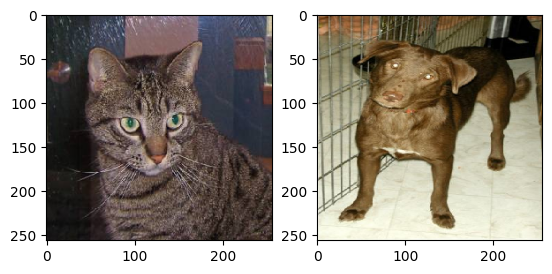

In [84]:
tensor1 = convert_image_to_tensor('data/Cat/1.jpg')
tensor2 = convert_image_to_tensor('data/Dog/1.jpg')
fig, ax = plt.subplots(1, 2)
ax[0].imshow(tensor1[0]) 
ax[1].imshow(tensor2[0])

In [85]:
def evaluate_layer_image(channel, tensor):
    layer_outputs = [layer.output for layer in model.layers[:8]] 
    activation_model = models.Model(inputs = model.input, outputs = layer_outputs) 
    activations = activation_model.predict(tensor)    
    first_layer_activation = activations[0]    
    # nth channel of the image after first layer of convolution is applied 
    plt.matshow(first_layer_activation[0, :, :, channel], cmap ='viridis') 

1/1 [==============================] - 0s 68ms/step


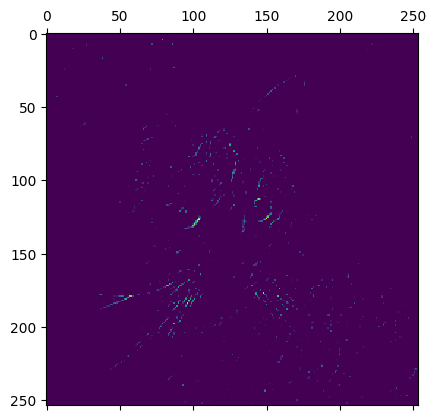

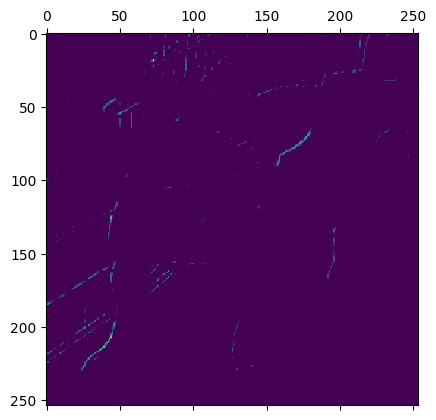

In [86]:
evaluate_layer_image(5, tensor1)
evaluate_layer_image(5, tensor2)

In [87]:
def evaluate_channel_image(channel, tensor):
    layer_outputs = [layer.output for layer in model.layers[:8]] 
    activation_model = models.Model(inputs = model.input, outputs = layer_outputs) 
    activations = activation_model.predict(tensor) 
      
    first_layer_activation = activations[0] 
      
    # nth channel of the image after first layer of convolution is applied 
    return first_layer_activation[0, :, :, channel]
      

1/1 [==============================] - 0s 66ms/step


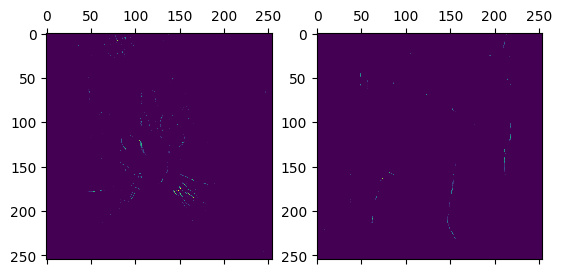

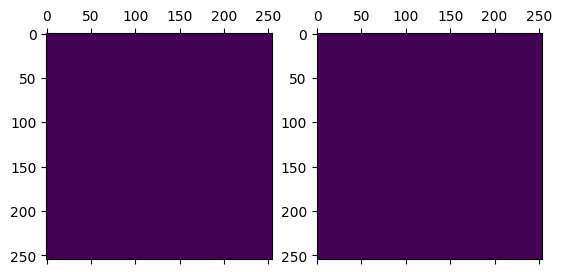

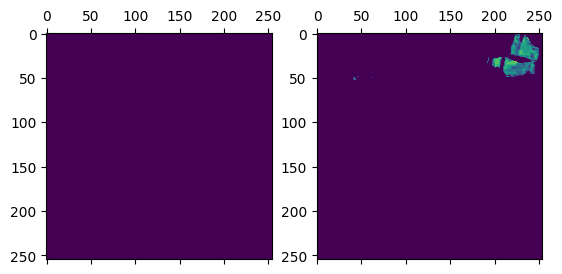

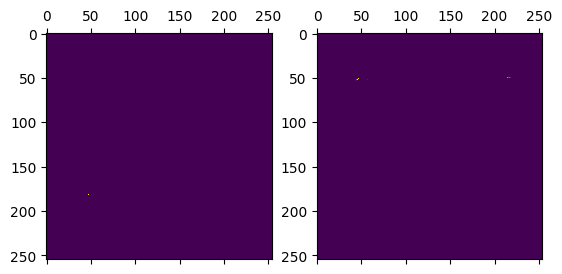

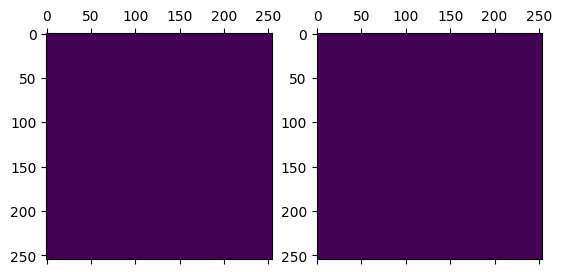

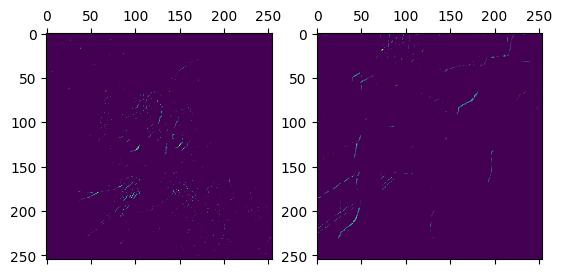

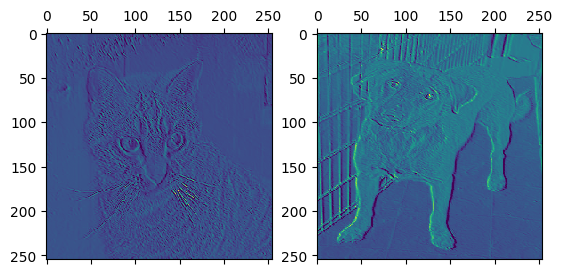

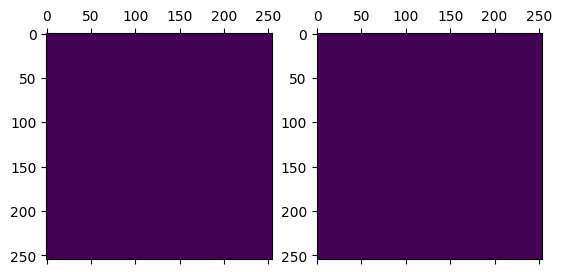

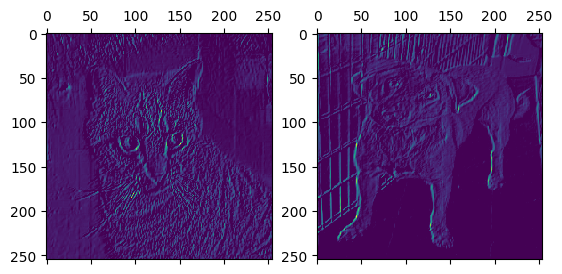

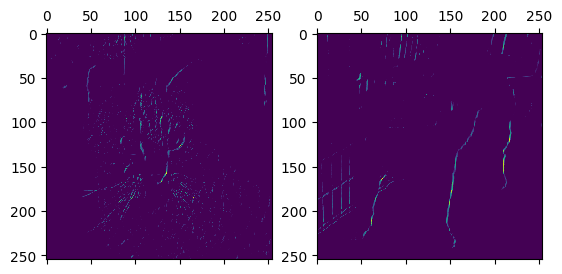

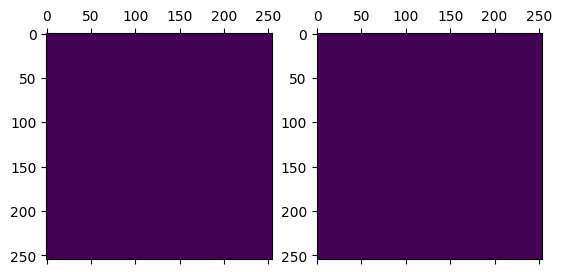

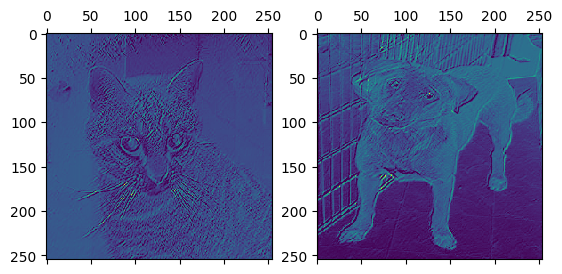

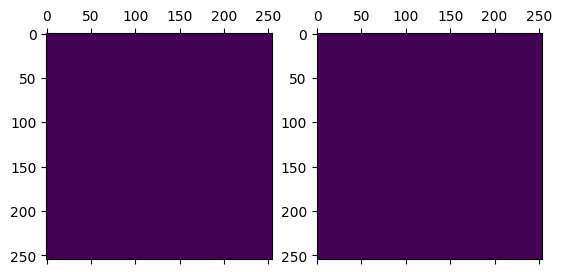

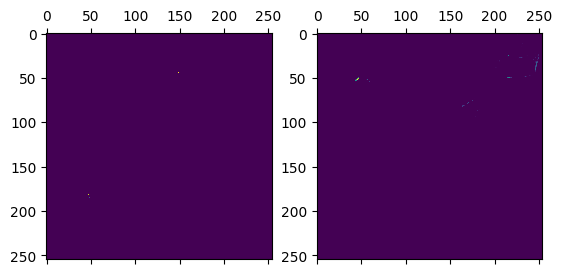

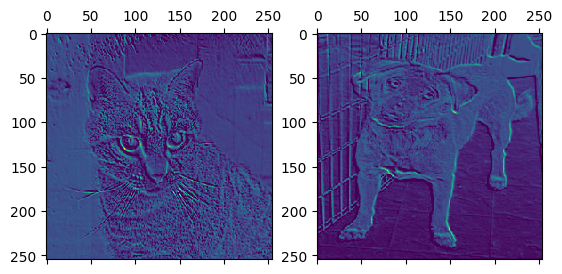

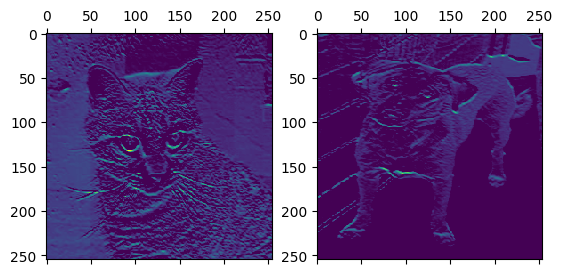

In [89]:
for i in range(16):
    fig, ax = plt.subplots(1, 2)
    ax[0].matshow(evaluate_channel_image(i, tensor1), cmap ='viridis')
    ax[1].matshow(evaluate_channel_image(i, tensor2), cmap ='viridis')